# The Mondesi Bet

By [Ben Welsh](https://palewi.re/who-is-ben-welsh/)

Can Raúl Adalberto Mondesi join an elite club by hitting 25 home runs and stealing 50 bases in the same season? That is the subject of this year's [NICAR baseball bet](https://twitter.com/ryanpitts/status/1103897815023927297).

In [1]:
import warnings
import pandas as pd
import altair as alt
import altair_latimes as lat

In [2]:
warnings.simplefilter("ignore")

In [3]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [4]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### How many players have done it before?

In [5]:
batters_by_season = pd.read_csv("./input/standard_player_batting_stats_all.csv")

In [28]:
batters_by_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105665 entries, 0 to 105664
Data columns (total 31 columns):
2B                           105665 non-null int64
3B                           105665 non-null int64
AB                           105665 non-null int64
BB                           105665 non-null int64
CS                           84370 non-null float64
G                            105665 non-null int64
GIDP                         78150 non-null float64
H                            105665 non-null int64
HBP                          102634 non-null float64
HR                           105665 non-null int64
IBB                          74500 non-null float64
PA                           105665 non-null int64
R                            105665 non-null int64
RBI                          104802 non-null float64
SB                           103051 non-null float64
SF                           66311 non-null float64
SH                           99047 non-null float64
SO         

In [31]:
trimmed_batters = batters_by_season[[
    'name_common',
    'player_ID',
    'team_ID',
    'year_ID',
    'age',
    'HR',
    'SB'
]].rename(columns={
    "name_common": "Name",
    "team_ID": "Team",
    "year_ID": "Year",
    "player_ID": "ID",
    "age": "Age"
})

In [32]:
trimmed_batters.SB.fillna(0, inplace=True)

In [33]:
trimmed_batters.SB = trimmed_batters.SB.astype(int)

In [34]:
trimmed_batters.head()

,Name,ID,Team,Year,Age,HR,SB
0,Frank Abercrombie,abercda01,TRO,1871,21,0,0
1,Bob Addy,addybo01,ROK,1871,29,0,8
2,Art Allison,allisar01,CLE,1871,22,0,3
3,Doug Allison,allisdo01,OLY,1871,24,2,1
4,Cap Anson,ansonca01,ROK,1871,19,0,6


In [35]:
the_club = trimmed_batters[
    (trimmed_batters.HR >= 25) &
    (trimmed_batters.SB >= 50)
]

In [36]:
len(the_club)

11

In [37]:
len(the_club.Name.unique())

7

In [38]:
the_club.sort_values("Year")

,Name,ID,Team,Year,Age,HR,SB
54590,Cesar Cedeno,cedence01,HOU,1973,22,25,56
54994,Joe Morgan,morgajo02,CIN,1973,29,26,67
55397,Cesar Cedeno,cedence01,HOU,1974,23,26,57
57441,Joe Morgan,morgajo02,CIN,1976,32,27,60
65051,Ryne Sandberg,sandbry01,CHC,1985,25,26,54
65385,Eric Davis,daviser01,CIN,1986,24,27,80
65543,Rickey Henderson,henderi01,NYY,1986,27,28,87
66249,Eric Davis,daviser01,CIN,1987,25,37,50
68882,Barry Bonds,bondsba01,PIT,1990,25,33,52
69158,Rickey Henderson,henderi01,OAK,1990,31,28,65


In [39]:
trimmed_batters['in_the_club'] = trimmed_batters.apply(
    lambda x: x.SB >= 50 and x.HR >= 25,
    axis=1
)

### Scatterplot

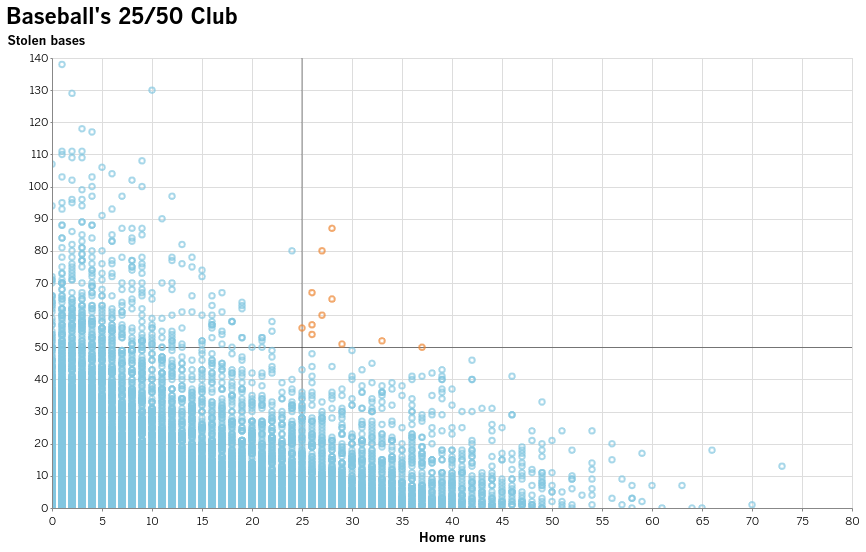

In [80]:
dots = alt.Chart(trimmed_batters).mark_point().encode(
    x=alt.X(
        "HR:Q",
        title="Home runs"
    ),
    y=alt.Y(
        "SB:Q",
        title="Stolen bases"
    ),
    color=alt.condition(
        alt.datum.in_the_club,
        alt.value(lat.palette['highlight']),
        alt.value(lat.palette['default'])
    ),
    tooltip=['Name', 'Team', 'Year', 'HR', 'SB']
)

threshold = pd.DataFrame([{"SB": 50, "HR": 25}])
rule = alt.Chart(threshold).mark_rule(
    color=lat.palette['black'],
    strokeWidth=0.5
)
ruleX = rule.encode(x='HR:Q')
ruleY = rule.encode(y='SB:Q')

(ruleX + ruleY + dots).properties(
    title="Baseball's 25/50 Club"
).interactive()